<a href="https://colab.research.google.com/github/Sayan0361/EDA/blob/main/PLACEMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***EXPLORATORY DATA ANALYSIS ON PLACEMENT DATASET OF A CAMPUS AND BUILDING A SIMPLE LINEAR MODEL***

*Dataset drive link:- https://drive.google.com/file/d/1wf2T8Ou3KZcdgHjAW5O82DXvydf7eMK_/view?usp=share_link*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q keras

In [ ]:
import keras

***READING OUR DATA***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as pre
import sklearn.model_selection as model_selection

df=pd.read_csv('/content/drive/MyDrive/Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


***DATA DICTIONARY:-***

sl_no-Serial Number 

 gender- M(male),F(female)

 ssc_p-Secondary Education percentage- 10th Grade

 ssc_b-Board of Education- Central/ Others

 hsc_p-Higher Secondary Education percentage- 12th Grade

 hsc_b-Board of Education- Central/ Others

 hsc_s-Specialization in Higher Secondary Education

 degree_p-Degree Percentage

 degree_t-Under Graduation(Degree type)- Field of degree education

 workex-Work Experience 

 etest_p-Employability test percentage ( conducted by college )

 specialisation - Post Graduation(MBA)- Specialization

 mba_p- MBA percentage

 status- Status of placement- Placed/Not placed
 
 salary - Salary offered by corporate to candidates

In [ ]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# ***EXPLORATORY DATA ANALYSIS***

In [ ]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df['hsc_s'].nunique()

3

In [ ]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

In [ ]:
df["hsc_s"].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

In [ ]:
df["degree_t"].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [ ]:
df['salary'].value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
360000.0     6
200000.0     6
265000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
270000.0     4
216000.0     3
350000.0     3
500000.0     3
252000.0     2
236000.0     2
230000.0     2
280000.0     2
218000.0     2
204000.0     2
276000.0     2
255000.0     1
285000.0     1
340000.0     1
690000.0     1
233000.0     1
290000.0     1
650000.0     1
264000.0     1
225000.0     1
940000.0     1
393000.0     1
380000.0     1
420000.0     1
425000.0     1
336000.0     1
231000.0     1
268000.0     1
450000.0     1
287000.0     1
411000.0     1
320000.0     1
278000.0     1
295000.0     1
Name: salary, dtype: int64

In [ ]:
df['salary'].unique()

array([270000., 200000., 250000.,     nan, 425000., 252000., 231000.,
       260000., 218000., 300000., 236000., 265000., 393000., 360000.,
       240000., 350000., 278000., 320000., 411000., 287000., 204000.,
       450000., 216000., 220000., 268000., 275000., 336000., 230000.,
       500000., 400000., 210000., 420000., 380000., 280000., 276000.,
       940000., 225000., 233000., 690000., 340000., 255000., 285000.,
       290000., 650000., 264000., 295000.])

In [ ]:
df['salary'].nunique()

45

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
num_cols=list(df.select_dtypes(exclude=['object']).columns)
num_cols  #numeric columns

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [ ]:
df[num_cols].describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols  #catogorial columns

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [ ]:
df[cat_cols].describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


***DATA VISUALIZATION***

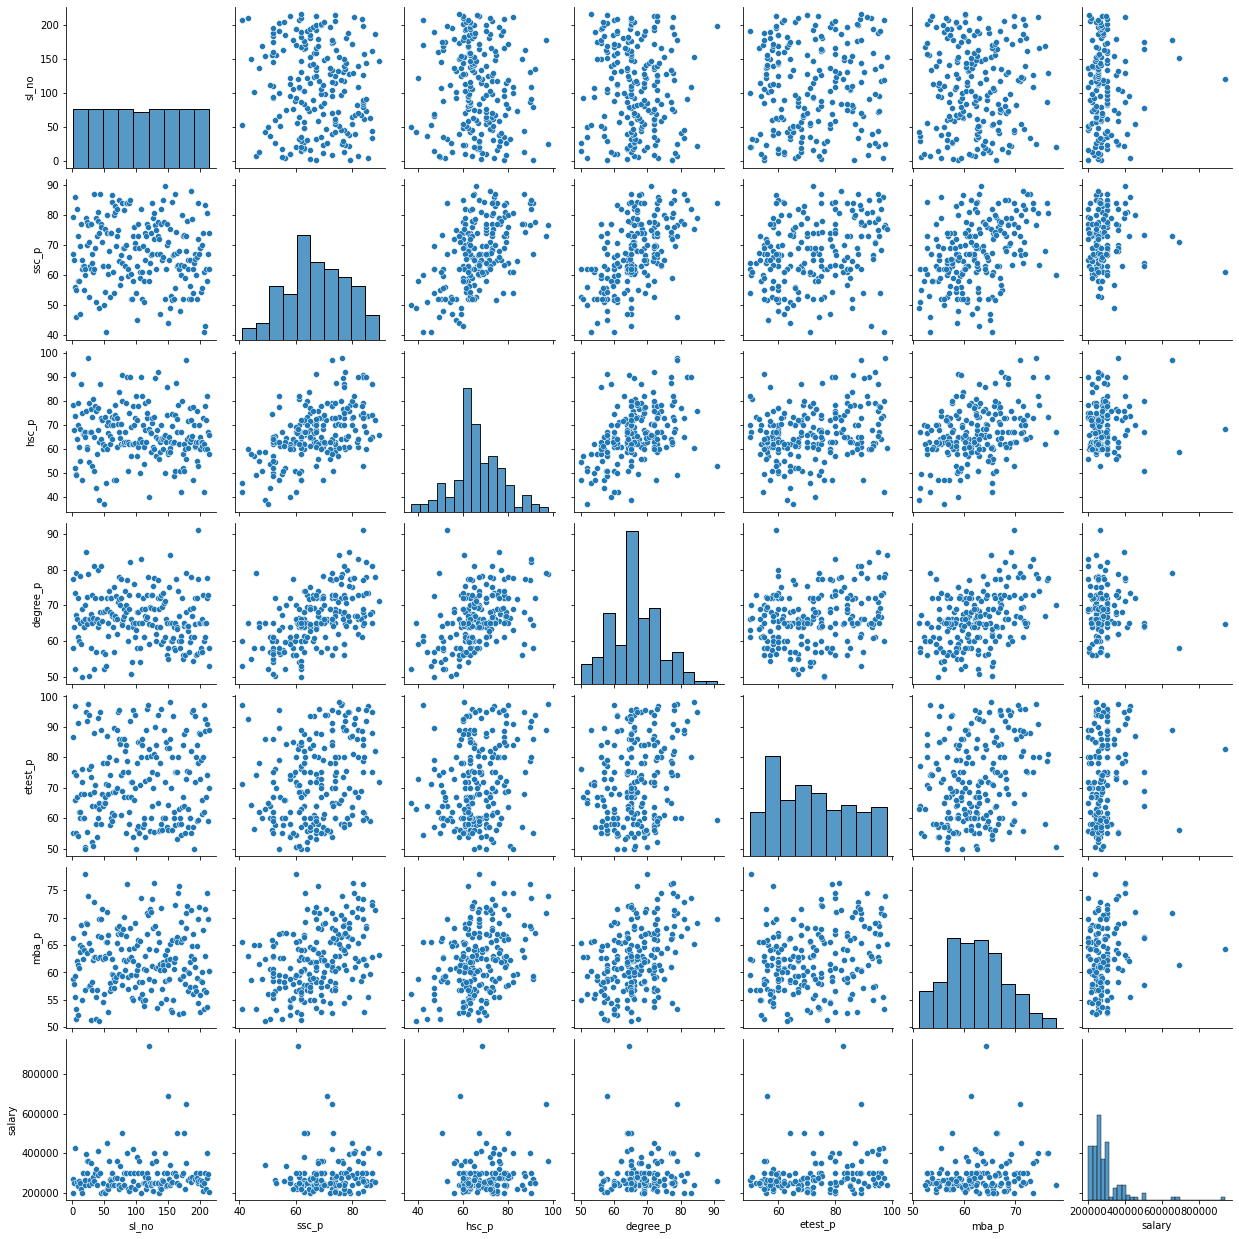

In [ ]:
sns.pairplot(df[num_cols])

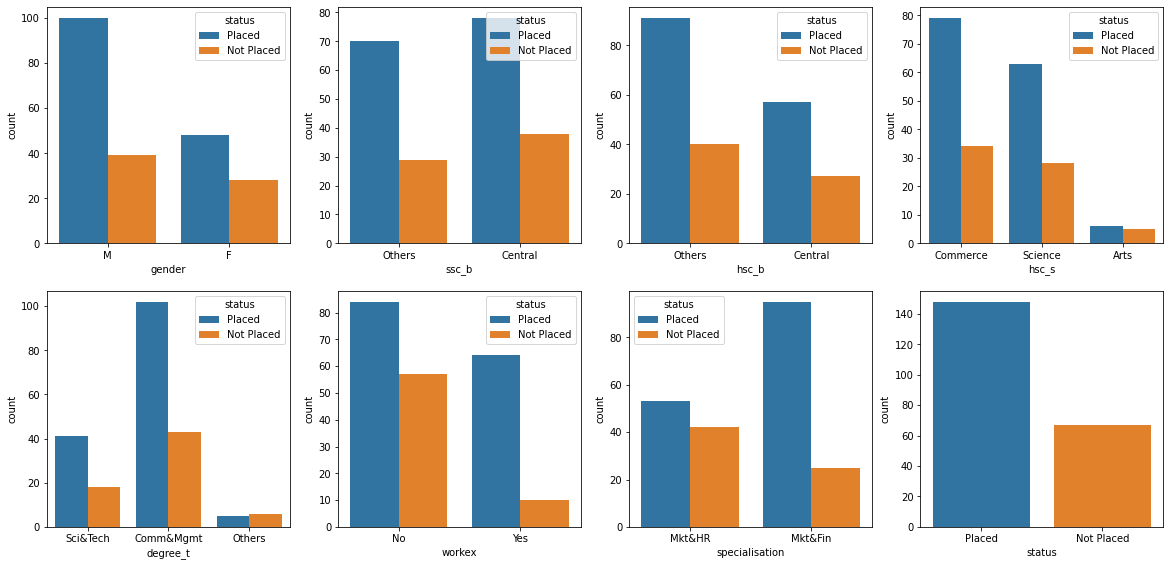

In [ ]:
plt.figure(figsize=[20,20])
for i in range(len(cat_cols)):
    plt.subplot(4,4,i+1)
    if(i<7):
        sns.countplot(x=df[cat_cols[i]], hue=df['status'])
    else:
        sns.countplot(x=df[cat_cols[i]])
plt.show()

***HOW GRADES AFFECT YOUR SALARY***

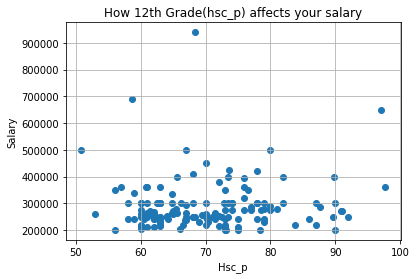

In [ ]:
plt.scatter(df['hsc_p'],df['salary'])
plt.title("How 12th Grade(hsc_p) affects your salary")
plt.xlabel("Hsc_p")
plt.ylabel("Salary")
plt.grid()

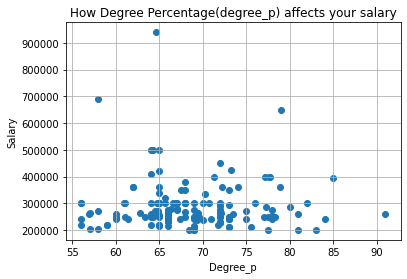

In [ ]:
plt.scatter(df['degree_p'],df['salary'])
plt.title("How Degree Percentage(degree_p) affects your salary")
plt.xlabel("Degree_p")
plt.ylabel("Salary")
plt.grid()

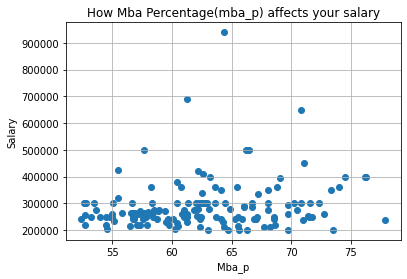

In [ ]:
plt.scatter(df['mba_p'],df['salary'])
plt.title("How Mba Percentage(mba_p) affects your salary")
plt.xlabel("Mba_p")
plt.ylabel("Salary")
plt.grid()

CONCLUSION :- There is very little correlation. Grades doesnot much affect your salary.

***HOW TYPE OF DEGREE AFFECT YOUR SALARY***

The Median for Sci&Tech is:  275000.0
The Upper Quartile for Sci&Tech is:  360000.0
The Lower Quartile for Sci&Tech is:  250000.0
The Inter Quartile Range for Sci&Tech is:  110000.0

The Median for Comm&Mgmt is:  260000.0
The Upper Quartile for Comm&Mgmt is:  300000.0
The Lower Quartile for Comm&Mgmt is:  237000.0
The Inter Quartile Range for Comm&Mgmt is:  63000.0

The Median for Others is:  252000.0
The Upper Quartile for Others is:  300000.0
The Lower Quartile for Others is:  250000.0
The Inter Quartile Range for Others is:  50000.0



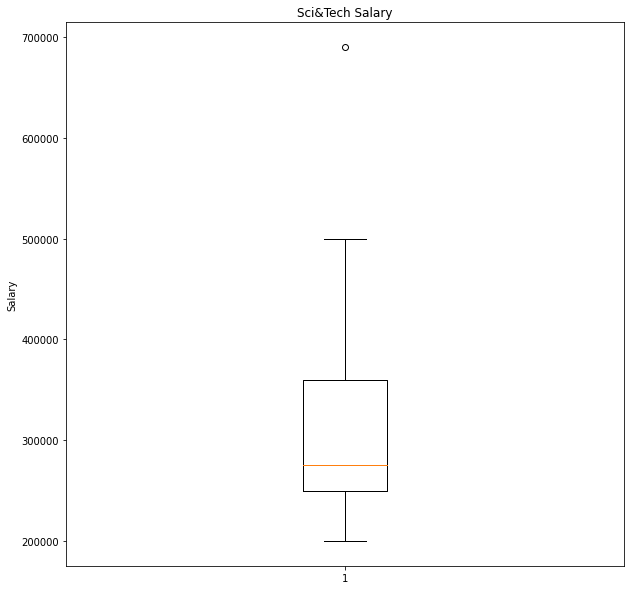

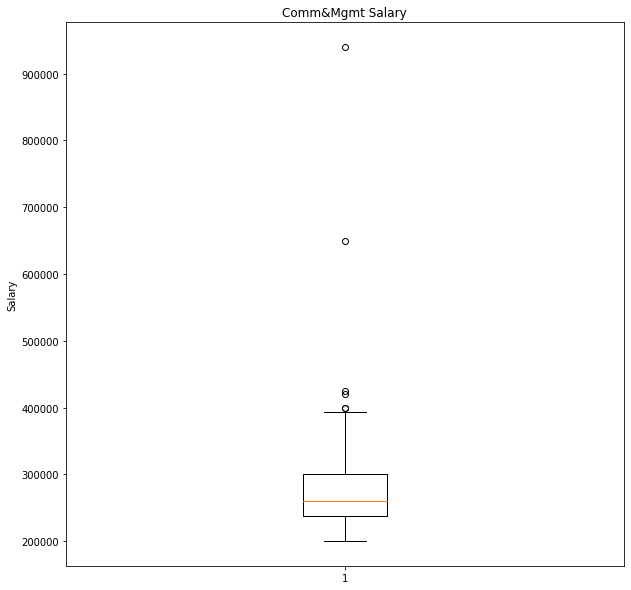

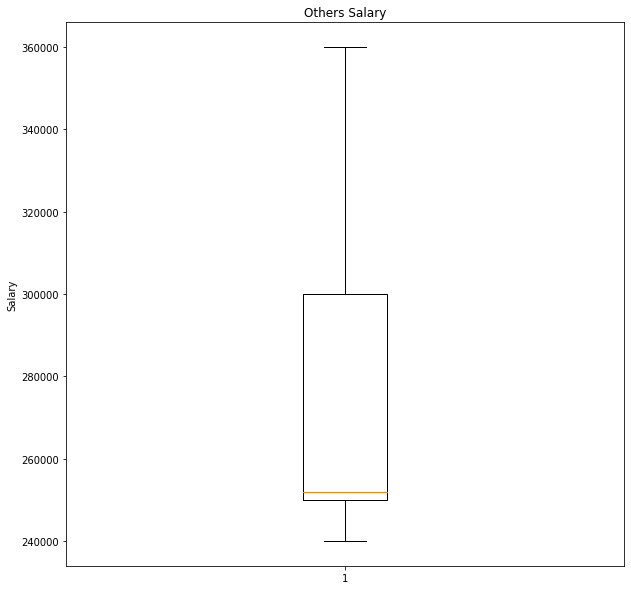

In [ ]:
degreetype=df["degree_t"].unique()

for degree in degreetype:
    fig = plt.figure(figsize =(10, 10))
    datatouse=df.loc[(df['degree_t']==degree)] 
    d2=datatouse["salary"].dropna()
    plt.boxplot(d2)
    plt.ylabel("Salary")
    plt.title(degree+" Salary")
    median = np.median(d2)
    upq = np.percentile(d2, 75)
    lq = np.percentile(d2, 25)

    iqr = upq - lq
    upperwhisker = d2[d2<=upq+1.5*iqr].max()
    lowerwhisker = d2[d2>=lq-1.5*iqr].min()
    print("The Median for",degree,"is: ",median)
    print("The Upper Quartile for",degree,"is: ",upq)
    print("The Lower Quartile for",degree,"is: ",lq)
    print("The Inter Quartile Range for",degree,"is: ",iqr)
    print("")

CONCLUSION :- The Median,Upper quartile,Lower quartile,and Interquartile range for Sci&Tech is higher than the other two

***HOW SPECIALISATION AFFECT YOUR SALARY***

The Median for Mkt&HR is:  255000.0
The Upper Quartile for Mkt&HR is:  300000.0
The Lower Quartile for Mkt&HR is:  240000.0
The Inter Quartile Range for Mkt&HR is:  60000.0

The Median for Mkt&Fin is:  270000.0
The Upper Quartile for Mkt&Fin is:  300000.0
The Lower Quartile for Mkt&Fin is:  240000.0
The Inter Quartile Range for Mkt&Fin is:  60000.0



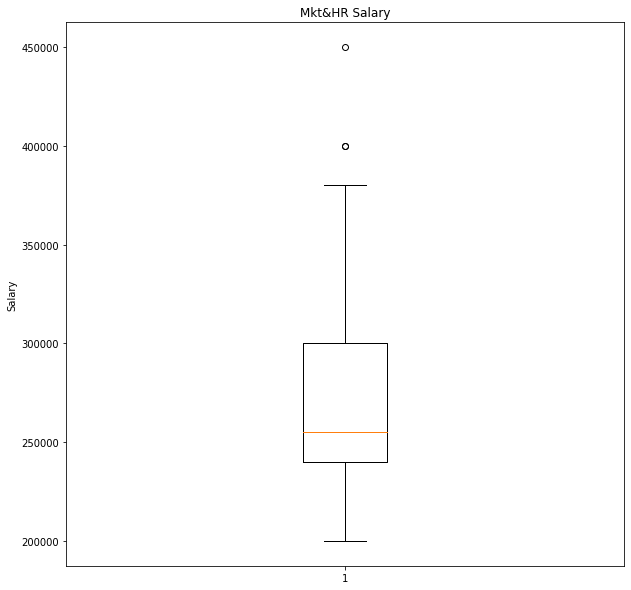

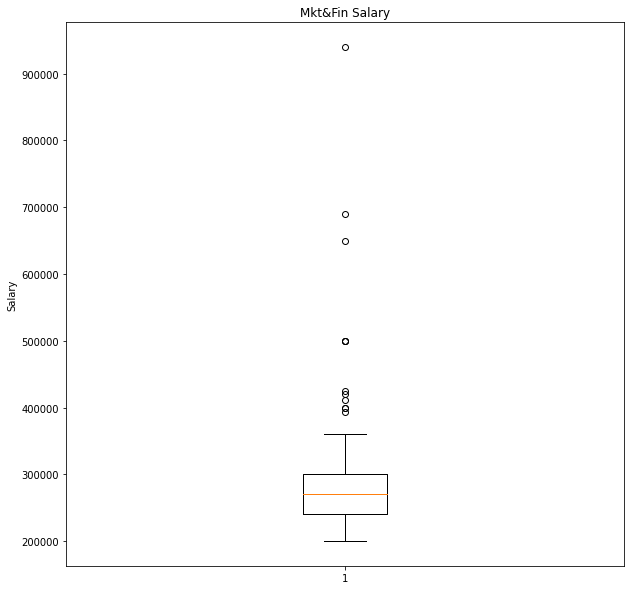

In [ ]:
sptype=df["specialisation"].unique()

for degree in sptype:
    fig = plt.figure(figsize =(10, 10))
    datatouse=df.loc[(df['specialisation']==degree)] 
    d2=datatouse["salary"].dropna()
    plt.boxplot(d2)
    plt.ylabel("Salary")
    plt.title(degree+" Salary")
    median = np.median(d2)
    upq = np.percentile(d2, 75)
    lq = np.percentile(d2, 25)

    iqr = upq - lq
    upperwhisker = d2[d2<=upq+1.5*iqr].max()
    lowerwhisker = d2[d2>=lq-1.5*iqr].min()
    print("The Median for",degree,"is: ",median)
    print("The Upper Quartile for",degree,"is: ",upq)
    print("The Lower Quartile for",degree,"is: ",lq)
    print("The Inter Quartile Range for",degree,"is: ",iqr)
    print("")

CONCLUSION :- The Median Salary of Mkt&Fin is slightly higher than that of Mkt&HR

***HOW GENDER AFFECT YOUR SALARY***

The Median for having M is:  270000.0
The Upper Quartile for M is:  300000.0
The Lower Quartile for M is:  250000.0
The Inter Quartile Range for M is:  50000.0

The Median for having F is:  250000.0
The Upper Quartile for F is:  300000.0
The Lower Quartile for F is:  219500.0
The Inter Quartile Range for F is:  80500.0



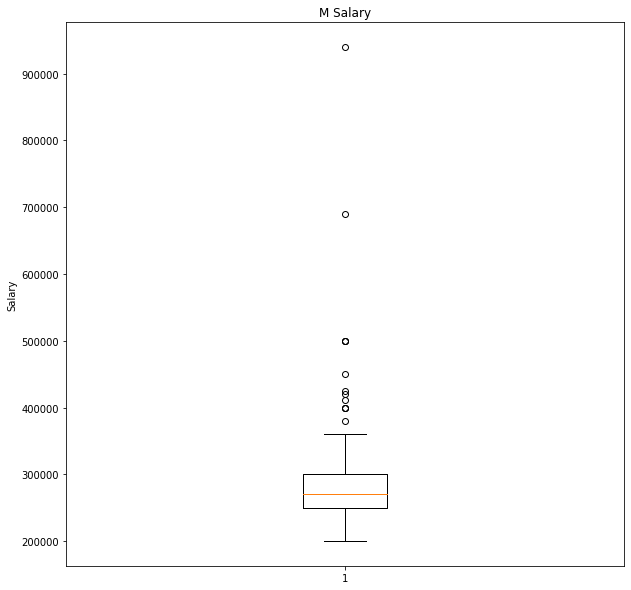

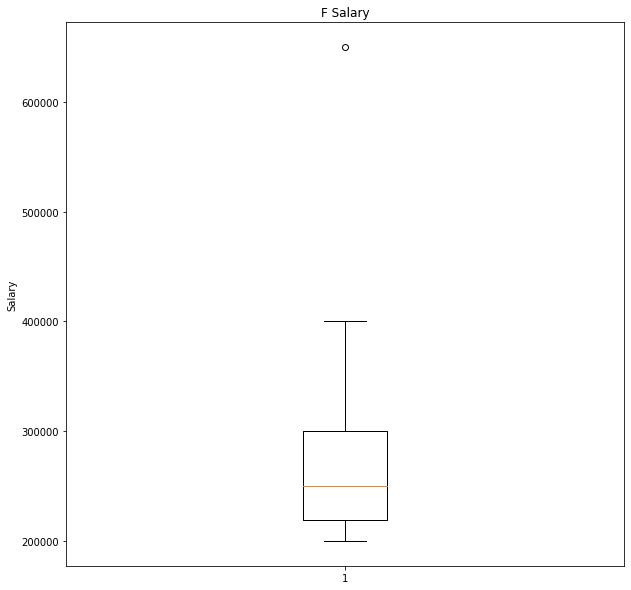

In [ ]:
gendertype=df["gender"].unique()

for degree in gendertype:
    fig = plt.figure(figsize =(10, 10))
    datatouse=df.loc[(df['gender']==degree)] 
    d2=datatouse["salary"].dropna()
    plt.boxplot(d2)
    plt.ylabel("Salary")
    plt.title(degree +" Salary")
    median = np.median(d2)
    upq = np.percentile(d2, 75)
    lq = np.percentile(d2, 25)

    iqr = upq - lq
    upperwhisker = d2[d2<=upq+1.5*iqr].max()
    lowerwhisker = d2[d2>=lq-1.5*iqr].min()
    print("The Median for having",degree,"is: ",median)
    print("The Upper Quartile for",degree,"is: ",upq)
    print("The Lower Quartile for",degree,"is: ",lq)
    print("The Inter Quartile Range for",degree,"is: ",iqr)
    print("")

CONCLUSION :- The Median salary of Male is slightly higher than that of Female 

***HOW WORK EXPERIENCE AFFECTS YOUR PLACEMENT***

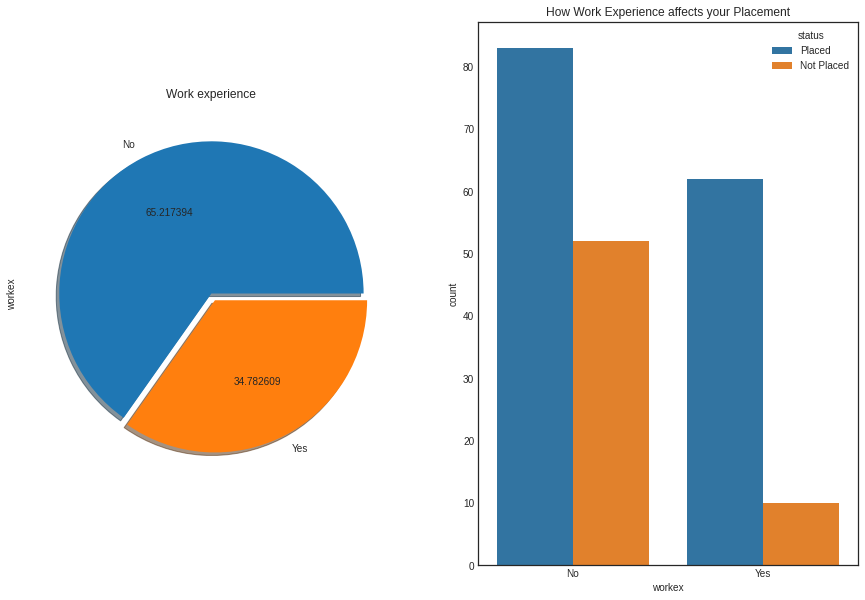

In [ ]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
df_filtered=df.loc[filter]

plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(15,10))
df_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],ax=ax[0],shadow=True,autopct='%f')
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df_filtered)
ax[1].set_title('How Work Experience affects your Placement')
plt.show()

CONCLUSION :- Almost 65% of candidates have no work experience and candidates who did not have any work experience , got placed more than those who already had work experience. So , work experience doesnot affects your placement.

# ***DATA TRANSFORMATION***

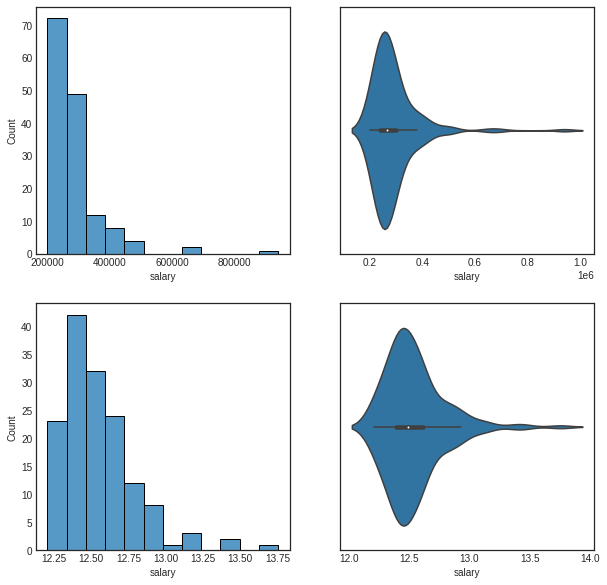

In [ ]:
transform_df_1=df.dropna(axis=0)
transform_df_1=transform_df_1.drop(['hsc_p','degree_p','mba_p'], axis=1)

plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
sns.histplot(transform_df_1['salary'], bins=12)
plt.subplot(2,2,2)
sns.violinplot(x=transform_df_1['salary'])

plt.subplot(2,2,3)
sns.histplot(np.log(transform_df_1['salary']), bins=12)
plt.subplot(2,2,4)
sns.violinplot(x=np.log(transform_df_1['salary']))
plt.show()

transform_df_1['salary']=np.log(transform_df_1['salary'])

In [ ]:
np.exp(np.log(12))

12.0

In [ ]:
#Inter Qualtile Range
Q1=np.percentile(transform_df_1['salary'], 25,interpolation='midpoint')
Q3=np.percentile(transform_df_1['salary'], 75,interpolation='midpoint')
IQR=Q3-Q1

#upper bound
upper=np.where(transform_df_1['salary']>=(Q3+1.5*IQR), transform_df_1.index,-1)
upper=upper[upper>-1]
print('Upper :', upper)

#lower bound
lower=np.where(transform_df_1['salary']<=(Q1-1.5*IQR), transform_df_1.index,-1)
lower=lower[lower>-1]
print('lower :', lower)

Upper : [  4  53  77  95 119 150 163 174 177]
lower : []


<ipython-input-43-9048f6283c41>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1=np.percentile(transform_df_1['salary'], 25,interpolation='midpoint')
<ipython-input-43-9048f6283c41>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3=np.percentile(transform_df_1['salary'], 75,interpolation='midpoint')


In [ ]:
print(transform_df_1.shape)
transform_df_1.drop(index=list(upper),inplace=True,axis=0)
print(transform_df_1.shape)

(148, 12)
(139, 12)


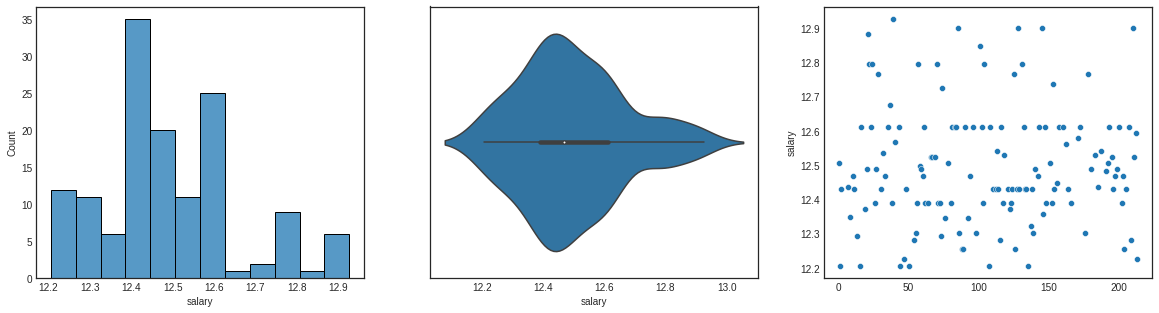

In [ ]:
#data visual after pre processing
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.histplot(transform_df_1['salary'], bins=12)
plt.subplot(1,3,2)
sns.violinplot(x=transform_df_1['salary'])
plt.subplot(1,3,3)
sns.scatterplot(x=transform_df_1.index, y=transform_df_1['salary'])
plt.show()


In [ ]:
labelencoder=pre.LabelEncoder()
for i in cat_cols:
    transform_df_1[i]=labelencoder.fit_transform(transform_df_1[i])
transform_df_1[cat_cols].head() 

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,1,1,1,2,0,1,0
1,1,0,1,2,2,1,0,0
2,1,0,0,0,0,0,0,0
7,1,0,0,2,2,1,0,0
8,1,0,0,1,0,0,0,0


<AxesSubplot:>

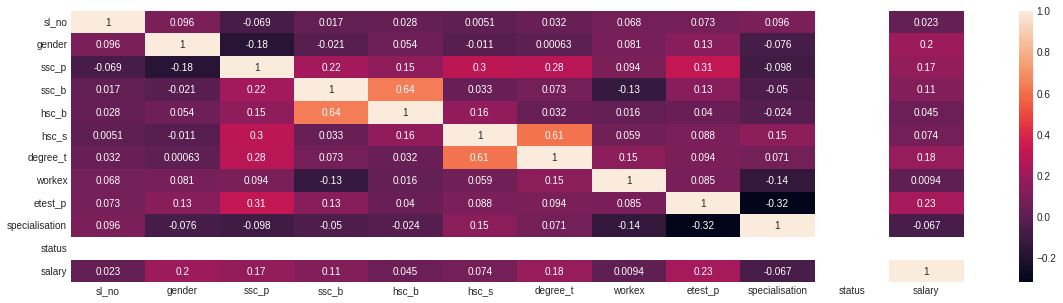

In [ ]:
plt.figure(figsize=[20,5])
sns.heatmap(transform_df_1.corr(),annot=True)

In [ ]:
transform_df_1=transform_df_1.drop(['specialisation','workex','hsc_s','hsc_b','status'], axis=1)
transform_df_1.shape

(139, 7)

<AxesSubplot:>

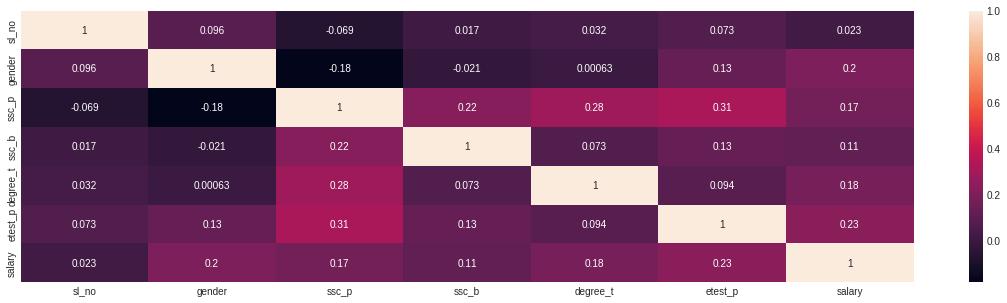

In [ ]:
plt.figure(figsize=[20,5])
sns.heatmap(transform_df_1.corr(), annot=True)

# ***BUILDING A MODEL***

In [ ]:
X=transform_df_1.drop('salary',axis=1)
y=transform_df_1['salary']

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y, test_size=0.20, random_state=1234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((111, 6), (28, 6), (111,), (28,))

In [ ]:
y_test=np.exp(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
#testing
y_pred=lr.predict(X_test)
y_pred=np.exp(y_pred)
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test,y_pred)))
print('R2',r2_score(y_test,y_pred))

MSE 2162568555.6751704
RMSE 46503.42520368979
R2 0.08560406106997476


In [ ]:
#Accuracy

def accuracy(col_list):
    #train test split
    X=transform_df_1[col_list]
    y=transform_df_1['salary']
    
    X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.20,random_state=1234)
    
    y_test=np.exp(y_test)
    
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    
    #testing
    y_pred=lr.predict(X_test)
    y_pred=np.exp(y_pred)
    print('MSE ',mean_squared_error(y_test,y_pred))
    print('RMSE ', math.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 {:.4f}'.format(r2_score(y_test,y_pred)))

In [ ]:
#Accuracy of all_cols
all_cols=['gender','ssc_p','ssc_b','degree_t','etest_p']
accuracy(all_cols)

MSE  2162596734.118235
RMSE  46503.72817439732
R2 0.0856


In [ ]:
#removing gender
#keep gender as r2 value decreased
all_cols.pop(all_cols.index('gender'))
print('columns considered ',all_cols)
accuracy(all_cols)
all_cols.append('gender')

columns considered  ['ssc_p', 'ssc_b', 'degree_t', 'etest_p']
MSE  2179830470.746659
RMSE  46688.654625579635
R2 0.0783


In [ ]:
#removing ssc_p
#discard ssc_p as r2 value increased
all_cols.pop(all_cols.index('ssc_p'))
print('columns considered ',all_cols)
accuracy(all_cols)

columns considered  ['ssc_b', 'degree_t', 'etest_p', 'gender']
MSE  2155554540.6276217
RMSE  46427.94999380892
R2 0.0886


In [ ]:
#removing ssc_b
#keep ssc_b as r2 value decreased
all_cols.pop(all_cols.index('ssc_b'))
print('columns considered ',all_cols)
accuracy(all_cols)
all_cols.append('ssc_b')

columns considered  ['degree_t', 'etest_p', 'gender']
MSE  2196860937.323653
RMSE  46870.6831326753
R2 0.0711


In [ ]:
#removing degree_t
all_cols.pop(all_cols.index('degree_t'))
print('columns considered ',all_cols)
accuracy(all_cols)

columns considered  ['etest_p', 'gender', 'ssc_b']
MSE  2120365892.469807
RMSE  46047.430899777755
R2 0.1034


In [ ]:
#removing etest_p
#keep etest_p as r2 value decreased
all_cols.pop(all_cols.index('etest_p'))
print('columns considered ',all_cols)
accuracy(all_cols)
all_cols.append('etest_p')

columns considered  ['gender', 'ssc_b']
MSE  2245804761.9567103
RMSE  47389.9225780831
R2 0.0504


# ***CONCLUSION***

In [ ]:
#ACCURACY OF ALL_COLS
print('Columns Considered ',all_cols)
accuracy(all_cols)

Columns Considered  ['gender', 'ssc_b', 'etest_p']
MSE  2120365892.469807
RMSE  46047.430899777755
R2 0.1034
